You are exploring the wilderness of _Mushroomia_, a land populated by a plethora of diverse fauna and flora. In particular, _Mushroomia_ is known for its unparalleled variety in mushrooms. However, not all the mushrooms in _Mushroomia_ are edible. As you make your way through _Mushroomia_, you would like to know which mushrooms are edible, in order to forage for supplies for your daily mushroom soup.

You have access to:
* _Shroomster Pro Max <sup>TM</sup>_ - a state of the art data collection device, developed by _Mushroomia_, that allows you to collect various data points about any mushroom you encounter in the wild
* _The National Archives on Mushrooms_ - a dataset collected over the years by the government of _Mushroomia_

To address this problem, you decide to use the skills you learnt in CSM148 and train machine learning models on the _The National Archives on Mushrooms_ in order to use your _Shroomster Pro Max <sup>TM</sup>_ to determine whether the mushrooms you encounter on your adventure can be added to your daily mushroom soup.  

This project will be more unstructured than the previous two projects in order to allow you to experience how data science problems are solved in practice. There are two parts to this project: a Jupyter Notebook with your code (where you explore, visualize, process your data and train machine learning models) and a report (where you explain the various choices you make in your implementation and analyze the final performance of your models).

# 1. Loading and Viewing Data



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
train_data = pd.read_csv('/content/drive/MyDrive/UCLA/Winter 2023/CS M148/Project 3/mushroom_train.csv', sep=';')
test_data = pd.read_csv('/content/drive/MyDrive/UCLA/Winter 2023/CS M148/Project 3/mushroom_test.csv', sep=';')
train_data.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,...,s,y,w,u,w,t,g,NaN,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,...,s,y,w,u,w,t,g,NaN,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,...,s,y,w,u,w,t,g,NaN,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,...,s,y,w,u,w,t,p,NaN,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,...,s,y,w,u,w,t,p,NaN,d,w


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50213 entries, 0 to 50212
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 50213 non-null  object 
 1   cap-diameter          50213 non-null  float64
 2   cap-shape             50213 non-null  object 
 3   cap-surface           37915 non-null  object 
 4   cap-color             50213 non-null  object 
 5   does-bruise-or-bleed  50213 non-null  object 
 6   gill-attachment       42447 non-null  object 
 7   gill-spacing          31064 non-null  object 
 8   gill-color            50213 non-null  object 
 9   stem-height           50213 non-null  float64
 10  stem-width            50213 non-null  float64
 11  stem-root             7413 non-null   object 
 12  stem-surface          19912 non-null  object 
 13  stem-color            50213 non-null  object 
 14  veil-type             3177 non-null   object 
 15  veil-color         

# 2. Splitting Data into Features and Labels

In [ ]:
# Only keep features that shroomster can detect!

In [ ]:
train_labels = train_data['class'].copy()
del train_data['class']
test_labels = test_data['class'].copy()
del test_data['class']
train_data.head()

,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,15.26,x,g,o,f,e,NaN,w,16.95,17.09,s,y,w,u,w,t,g,NaN,d,w
1,16.60,x,g,o,f,e,NaN,w,17.99,18.19,s,y,w,u,w,t,g,NaN,d,u
2,14.07,x,g,o,f,e,NaN,w,17.80,17.74,s,y,w,u,w,t,g,NaN,d,w
3,14.17,f,h,e,f,e,NaN,w,15.77,15.98,s,y,w,u,w,t,p,NaN,d,w
4,14.64,x,h,o,f,e,NaN,w,16.53,17.20,s,y,w,u,w,t,p,NaN,d,w


# 3. Data Exploration and Visualization

In [ ]:
# Hint: We have done this in both project 1 & 2

import matplotlib.pyplot as plt
import plotly.express as px
import sklearn

<AxesSubplot:>

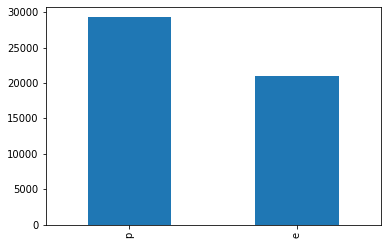

In [ ]:
train_labels.value_counts().plot(kind='bar')

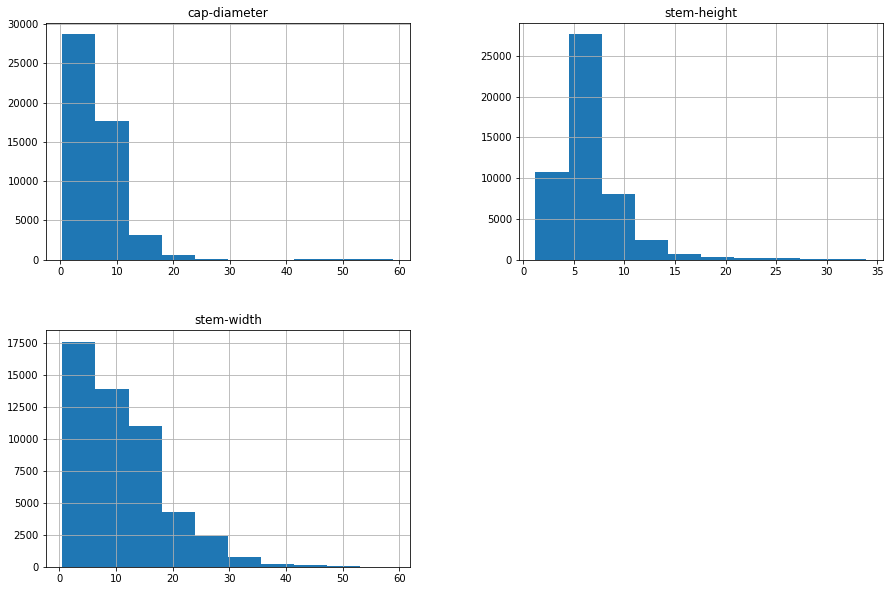

In [ ]:
num_cols = [col for col in train_data.columns if train_data[col].dtype != object]
num_df = pd.DataFrame(train_data[num_cols])
num_df.hist(figsize=(15,10));

<AxesSubplot:>

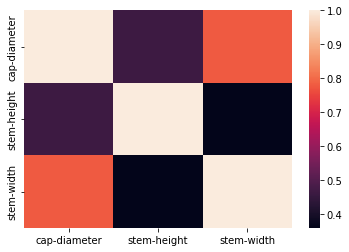

In [ ]:
import seaborn as sns

sns.heatmap(train_data.corr())

<AxesSubplot:xlabel='cap-shape', ylabel='count'>

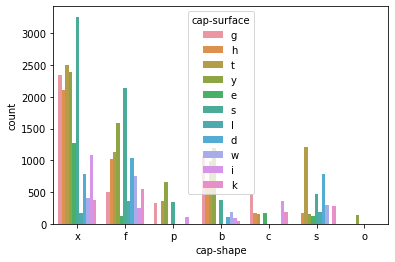

In [ ]:
sns.countplot(data = train_data, x = "cap-shape", hue = "cap-surface")

<AxesSubplot:>

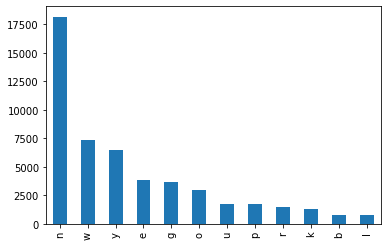

In [ ]:
train_data['cap-color'].value_counts().plot(kind='bar')

<AxesSubplot:ylabel='has-ring'>

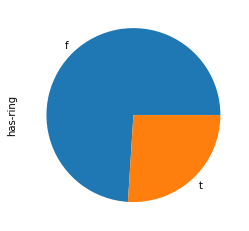

In [ ]:
train_data['has-ring'].value_counts().plot(kind='pie')

<AxesSubplot:>

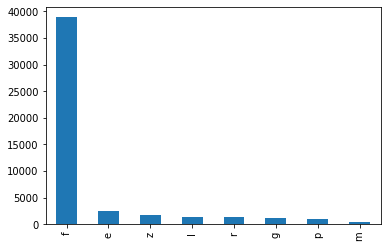

In [ ]:
train_data['ring-type'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='season', ylabel='count'>

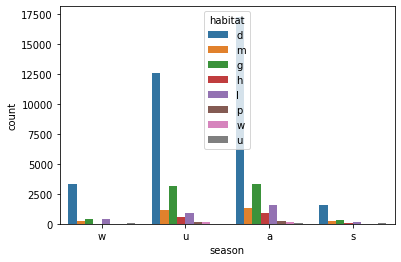

In [ ]:
sns.countplot(data = train_data, x = "season", hue = "habitat")

# 4. Data Processing

In [ ]:
# Hints:
# 1. Convert the "class" column into labels: 'p' (poisonous) -> 0,  'e' (edible) -> 1
# 2. You can drop columns if you see fit
# 3. See any imcomplete data? We learned how to deal with them in project 1.

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer

In [ ]:
train_labels = [0 if i == 'p' else 1 for i in train_labels]
test_labels = [0 if i == 'p' else 1 for i in test_labels]

In [ ]:
null_cols = train_data.isnull().sum()
deleted_cols = []
for col in train_data.columns:
  if null_cols[col] >= len(train_data) / 2:
    deleted_cols.append(col)
    del train_data[col]
deleted_cols

['stem-root', 'stem-surface', 'veil-type', 'veil-color', 'spore-print-color']

In [ ]:
nulls = train_data.columns[train_data.isnull().any()].tolist()
modes = train_data.mode()
for i in nulls:
  train_data[i] = train_data[i].fillna(modes[i][0])
  test_data[i] = test_data[i].fillna(modes[i][0])
train_data.head()

,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
0,15.26,x,g,o,f,e,c,w,16.95,17.09,w,t,g,d,w
1,16.60,x,g,o,f,e,c,w,17.99,18.19,w,t,g,d,u
2,14.07,x,g,o,f,e,c,w,17.80,17.74,w,t,g,d,w
3,14.17,f,h,e,f,e,c,w,15.77,15.98,w,t,p,d,w
4,14.64,x,h,o,f,e,c,w,16.53,17.20,w,t,p,d,w


# 5. Data Augmentation (Creating at least 2 New Features)

In [ ]:
import math

train_data['stem-volume'] = math.pi * (train_data['stem-width'] / 20)**2 * train_data['stem-height']
train_data['cap-surface-area'] = math.pi * (train_data['cap-diameter'] / 2)**2

test_data['stem-volume'] = math.pi * (test_data['stem-width'] / 20)**2 * test_data['stem-height']
test_data['cap-surface-area'] = math.pi * (test_data['cap-diameter'] / 2)**2

train_data.head()

,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season,stem-volume,cap-surface-area
0,15.26,x,g,o,f,e,c,w,16.95,17.09,w,t,g,d,w,38.881563,182.893785
1,16.60,x,g,o,f,e,c,w,17.99,18.19,w,t,g,d,u,46.750520,216.424318
2,14.07,x,g,o,f,e,c,w,17.80,17.74,w,t,g,d,w,43.996397,155.481269
3,14.17,f,h,e,f,e,c,w,15.77,15.98,w,t,p,d,w,31.628247,157.699233
4,14.64,x,h,o,f,e,c,w,16.53,17.20,w,t,p,d,w,38.407817,168.334074


# 6.  Logistic Regression & Statistical Hypothesis Testing

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn import metrics

In [ ]:
numerical = [col for col in train_data.columns if train_data[col].dtype != object]
categorical = [col for col in train_data.columns if train_data[col].dtype == object]

num_pipeline = Pipeline([
  ('std_scaler', StandardScaler())
])
num_transformed = num_pipeline.fit_transform(train_data[numerical])

full_pipeline = ColumnTransformer([
  ("num", num_pipeline, numerical),
  ("cat", OneHotEncoder(categories='auto', handle_unknown='ignore'), categorical),
])

prepared_train = full_pipeline.fit_transform(train_data).toarray()
prepared_test = full_pipeline.transform(test_data).toarray()
pd.DataFrame(prepared_train)

,0,1,2,3,4,5,6,7,8,9,...,83,84,85,86,87,88,89,90,91,92
0,1.984546,3.212433,0.816899,1.691353,1.139376,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2.279537,3.535246,0.958927,2.163525,1.420173,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.722576,3.476271,0.900825,1.998265,0.909814,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.744590,2.846165,0.673579,1.256122,0.928388,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.848058,3.082067,0.831101,1.662926,1.017448,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50208,-1.115064,-0.828934,-0.586603,-0.570057,-0.383085,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
50209,-1.095251,-1.061732,-0.688605,-0.597525,-0.381635,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
50210,-1.095251,-0.850662,-0.567236,-0.567898,-0.381635,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
50211,-1.101855,-0.943781,-0.687314,-0.592062,-0.382130,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
log_reg = LogisticRegression(solver='liblinear', max_iter=200)
log_reg.fit(prepared_train, train_labels)
pred = log_reg.predict(prepared_test)

print("%-12s %f" % ("Accuracy:", metrics.accuracy_score(test_labels, pred)))
print("%-12s %f" % ('Precision:', metrics.precision_score(test_labels, pred)))
print("%-12s %f" % ('Recall:', metrics.recall_score(test_labels, pred)))
print("%-12s %f" % ('F1 Score:', metrics.f1_score(test_labels, pred)))

Accuracy:    0.508659
Precision:   0.822059
Recall:      0.180032
F1 Score:    0.295376


In [ ]:
import statsmodels.api as sm

prepared_train_subset = pd.DataFrame(prepared_train).iloc[:, 0:5].to_numpy()
sm_x = sm.add_constant(prepared_train_subset)
model = sm.GLM(train_labels, sm_x, family=sm.families.Binomial()).fit()

print(model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                50213
Model:                            GLM   Df Residuals:                    50207
Model Family:                Binomial   Df Model:                            5
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -33232.
Date:                Sun, 05 Mar 2023   Deviance:                       66463.
Time:                        04:56:12   Pearson chi2:                 5.01e+04
No. Iterations:                     5   Pseudo R-squ. (CS):            0.03479
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3411      0.009    -36.940      0.0

# 7. Dimensionality Reduction using PCA



In [ ]:
# PCA: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=0.95)
train_reduced = pca.fit_transform(prepared_train)
print(pca.explained_variance_ratio_)

[0.29075028 0.08465817 0.05601896 0.04045343 0.03595299 0.03503712
 0.03179762 0.02752867 0.02667137 0.02451593 0.02322699 0.02057723
 0.01893789 0.01738452 0.0145175  0.0140315  0.01358326 0.0121863
 0.01135677 0.00999969 0.00996342 0.00956662 0.00928222 0.00841659
 0.00823764 0.00776558 0.00760468 0.00726399 0.00685193 0.00617157
 0.00600203 0.0054699  0.00515389 0.00503568 0.00483555 0.0046934
 0.00434643 0.00405213 0.0038237  0.00371487 0.00351743 0.00328609
 0.00326429 0.0030134 ]


In [ ]:
log_reg2 = LogisticRegression(solver='liblinear')
log_reg2.fit(train_reduced, train_labels)

test_reduced = pca.transform(prepared_test)
pred2 = log_reg2.predict(test_reduced)

print("%-12s %f" % ("Accuracy:", metrics.accuracy_score(test_labels, pred2)))
print("%-12s %f" % ('Precision:', metrics.precision_score(test_labels, pred2)))
print("%-12s %f" % ('Recall:', metrics.recall_score(test_labels, pred2)))
print("%-12s %f" % ('F1 Score:', metrics.f1_score(test_labels, pred2)))

Accuracy:    0.512896
Precision:   0.869391
Recall:      0.174718
F1 Score:    0.290963


# 8. Experiment with any 2 other models (Non-Ensemble)

In [ ]:
# Models: https://scikit-learn.org/stable/supervised_learning.html

from sklearn.linear_model import RidgeClassifier

rc = RidgeClassifier().fit(prepared_train, train_labels)
ridge_pred = rc.predict(prepared_test)

print("%-12s %f" % ("Accuracy:", metrics.accuracy_score(test_labels, ridge_pred)))
print("%-12s %f" % ('Precision:', metrics.precision_score(test_labels, ridge_pred)))
print("%-12s %f" % ('Recall:', metrics.recall_score(test_labels, ridge_pred)))
print("%-12s %f" % ('F1 Score:', metrics.f1_score(test_labels, ridge_pred)))

Accuracy:    0.502119
Precision:   0.788945
Recall:      0.176973
F1 Score:    0.289096


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier().fit(prepared_train, train_labels)
knn_pred = knn.predict(prepared_test)

print("%-12s %f" % ("Accuracy:", metrics.accuracy_score(test_labels, knn_pred)))
print("%-12s %f" % ('Precision:', metrics.precision_score(test_labels, knn_pred)))
print("%-12s %f" % ('Recall:', metrics.recall_score(test_labels, knn_pred)))
print("%-12s %f" % ('F1 Score:', metrics.f1_score(test_labels, knn_pred)))

Accuracy:    0.530490
Precision:   0.683603
Recall:      0.333655
F1 Score:    0.448436


# 9. Experiment with 1 Ensemble Method

In [ ]:
# Ensemble Methods: https://scikit-learn.org/stable/modules/ensemble.html

from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=10).fit(prepared_train, train_labels)
rfc_pred = rfc.predict(prepared_test)

print("%-12s %f" % ("Accuracy:", metrics.accuracy_score(test_labels, rfc_pred)))
print("%-12s %f" % ('Precision:', metrics.precision_score(test_labels, rfc_pred)))
print("%-12s %f" % ('Recall:', metrics.recall_score(test_labels, rfc_pred)))
print("%-12s %f" % ('F1 Score:', metrics.f1_score(test_labels, rfc_pred)))

Accuracy:    0.576916
Precision:   0.806134
Recall:      0.342834
F1 Score:    0.481076


# 10. Cross-Validation & Hyperparameter Tuning for All 3 Models

In [ ]:
# Cross-Validation: https://scikit-learn.org/stable/modules/cross_validation.html
# Hyperparameter Tuning: https://scikit-learn.org/stable/modules/grid_search.html

from sklearn.model_selection import KFold, GridSearchCV, cross_val_score

kfold = KFold(n_splits=10, random_state=42, shuffle=True)

In [ ]:
rc_model = RidgeClassifier()

rc_cv = cross_val_score(rc_model, prepared_train, train_labels, cv=kfold)
print("Ridge Classifier Cross Validation Accuracy: %.2f%% " % (rc_cv.mean()*100.0))

Ridge Classifier Cross Validation Accuracy: 80.33% 


In [ ]:
rc_params = {'alpha': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]}
rc_gs = GridSearchCV(rc_model, rc_params, cv=kfold, scoring='accuracy').fit(prepared_train, train_labels)

print("Ridge Classifier:")
print("Best model: ", rc_gs.best_estimator_)
print("Best hyperparameters:", rc_gs.best_params_)
print("Best Accuracy: %.2f%% " % (rc_gs.best_score_*100.0))

Ridge Classifier:
Best model:  RidgeClassifier(alpha=0.2)
Best hyperparameters: {'alpha': 0.2}
Best Accuracy: 80.34% 


In [ ]:
knn_model = KNeighborsClassifier()

knn_cv = cross_val_score(knn_model, prepared_train, train_labels, cv=kfold)
print("KNN Cross Validation Accuracy: %.2f%% " % (knn_cv.mean()*100.0))

KNN Cross Validation Accuracy: 99.99% 


In [ ]:
knn_params = {'n_neighbors': [5, 10, 20, 30, 50]}
knn_gs = GridSearchCV(knn_model, knn_params, cv=kfold, scoring='accuracy').fit(prepared_train, train_labels)

print("KNN:")
print("Best model: ", knn_gs.best_estimator_)
print("Best hyperparameters:", knn_gs.best_params_)
print("Best Accuracy: %.2f%% " % (knn_gs.best_score_*100.0))

KNN:
Best model:  KNeighborsClassifier()
Best hyperparameters: {'n_neighbors': 5}
Best Accuracy: 99.99% 


In [ ]:
rfc_model = RandomForestClassifier()

rfc_cv = cross_val_score(rfc_model, prepared_train, train_labels, cv=kfold)
print("Random Forest Classifier Cross Validation Accuracy: %.2f%% " % (rfc_cv.mean()*100.0))

Random Forest Classifier Cross Validation Accuracy: 99.99% 


In [ ]:
rfc_params = [{
    'n_estimators': [100, 250, 500],
    'criterion': ['gini', 'entropy'],
    'class_weight': ['balanced', None]
}]
rfc_gs = GridSearchCV(rfc_model, rfc_params, cv=kfold, scoring='accuracy').fit(prepared_train, train_labels)

print("Random Forest Classifier:")
print("Best model: ", rfc_gs.best_estimator_)
print("Best hyperparameters:", rfc_gs.best_params_)
print("Best Accuracy: %.2f%% " % (rfc_gs.best_score_*100.0))

Random Forest Classifier:
Best model:  RandomForestClassifier()
Best hyperparameters: {'class_weight': None, 'criterion': 'gini', 'n_estimators': 100}
Best Accuracy: 99.99% 


# 11. Report Final Results

In [ ]:
# e.g. Accuracy, Precision etc.

print("Logistic Regression:")
print("%-12s %f" % ("Accuracy:", metrics.accuracy_score(test_labels, pred2)))
print("%-12s %f" % ('Precision:', metrics.precision_score(test_labels, pred2)))
print("%-12s %f" % ('Recall:', metrics.recall_score(test_labels, pred2)))
print("%-12s %f" % ('F1 Score:', metrics.f1_score(test_labels, pred2)))

Logistic Regression:
Accuracy:    0.512896
Precision:   0.869391
Recall:      0.174718
F1 Score:    0.290963


In [ ]:
rc2 = RidgeClassifier(alpha=0.2).fit(prepared_train, train_labels)
ridge_pred2 = rc2.predict(prepared_test)

print("%-12s %f" % ("Accuracy:", metrics.accuracy_score(test_labels, ridge_pred2)))
print("%-12s %f" % ('Precision:', metrics.precision_score(test_labels, ridge_pred2)))
print("%-12s %f" % ('Recall:', metrics.recall_score(test_labels, ridge_pred2)))
print("%-12s %f" % ('F1 Score:', metrics.f1_score(test_labels, ridge_pred2)))

Accuracy:    0.502119
Precision:   0.788945
Recall:      0.176973
F1 Score:    0.289096


In [ ]:
knn2 = KNeighborsClassifier(n_neighbors=5).fit(prepared_train, train_labels)
knn_pred2 = knn2.predict(prepared_test)

print("%-12s %f" % ("Accuracy:", metrics.accuracy_score(test_labels, knn_pred2)))
print("%-12s %f" % ('Precision:', metrics.precision_score(test_labels, knn_pred2)))
print("%-12s %f" % ('Recall:', metrics.recall_score(test_labels, knn_pred2)))
print("%-12s %f" % ('F1 Score:', metrics.f1_score(test_labels, knn_pred2)))

Accuracy:    0.530490
Precision:   0.683603
Recall:      0.333655
F1 Score:    0.448436


In [ ]:
rfc2 = RandomForestClassifier(n_estimators=100, criterion='gini').fit(prepared_train, train_labels)
rfc_pred2 = rfc2.predict(prepared_test)

print("%-12s %f" % ("Accuracy:", metrics.accuracy_score(test_labels, rfc_pred2)))
print("%-12s %f" % ('Precision:', metrics.precision_score(test_labels, rfc_pred2)))
print("%-12s %f" % ('Recall:', metrics.recall_score(test_labels, rfc_pred2)))
print("%-12s %f" % ('F1 Score:', metrics.f1_score(test_labels, rfc_pred2)))

Accuracy:    0.589075
Precision:   0.863920
Recall:      0.334300
F1 Score:    0.482062
